## Import Necessary Functions

These are required to utilise functions specific for data analysis and visualisations.

In [101]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## Read the Data

In [103]:
import pickle


# Load the DataFrame from the Pickle file
with open('../data/churn_data.pickle', 'rb') as f:
    df = pickle.load(f)

### Alternatively, you may run this code

In [104]:
if input("Did you have issues with downloading the data set? Y/N" ) =="Y":
    # Direct link to the CSV file on Google Drive
    csv_url = 'https://drive.google.com/uc?id=14HTdhAmJd_U3mJDnwLHPbu6pvh-Yv0vu'

    # Read the CSV file from the URL
    df = pd.read_csv(csv_url)
    df.shape



The DataFrame has 10000 rows with 14 attributes. We continue to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling can be done. 


## Initital Exploration

In [105]:
# A quick look
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The .head(5) pandas function generates a well-structured format of the csv file with the first 5 rows organised.

In [106]:
# What attributes do we have? 
list(df.columns)

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [107]:

# Description of the data 
print(df.describe()) 

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [108]:
# Check columns list and missing values

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values!

In [109]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

From the above, we will not require the first 2 attributes as these are specific to a customer. For data privacy, we remove the surname as well.

In [110]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

The parameter axis = 1 specifies we want to drop these labels from the column. 

We will exclude RowNumber, CustomerId and Surname for reasons explained above.

Notice we now have 1000 rows and only 11 attributes. 

In [111]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

So we mostly have categorical variables and 5 continuous variables.

## Exploratory Data Analysis

Here our main interest is to get an understanding as to how the given attributes relate too the 'Exit' status.



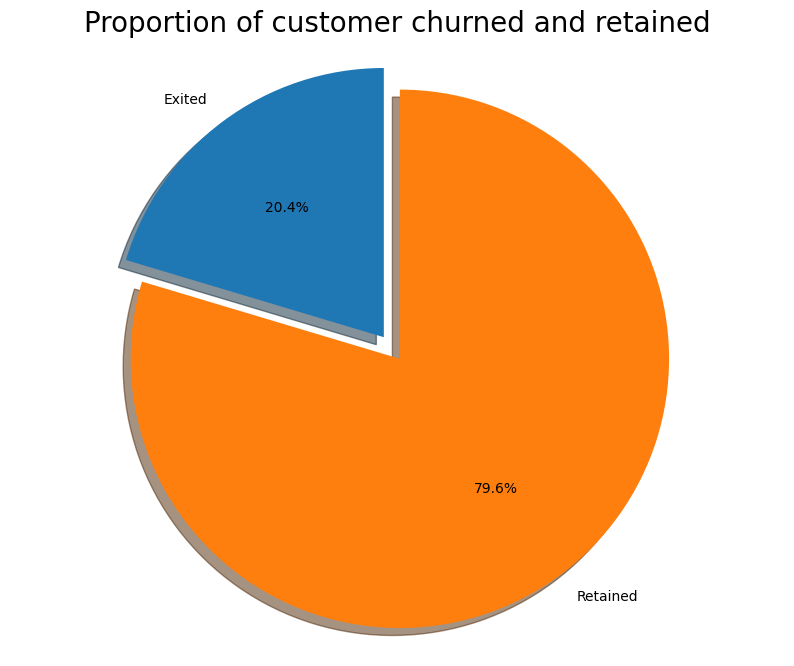

In [112]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

So from our available data about 20% of customers have churned. One could assume a baseline model to predict that 20% of the customers will churn, however thsis might not generalize well to other datasets. Hence, we seek to build models on 80% of the data and treat the remaining as unseen with the impression that building a well-rounded model is more important for the bank. We must emphises that 20% is a small number, so we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

# We first review Exited vs Churned in relation to the categorical variables

We want to analyse the number of individuals who exited in relation to a categorical variable. For instance, we want to determine how many customers either exited or remained in Germany.

<Axes: xlabel='IsActiveMember', ylabel='count'>

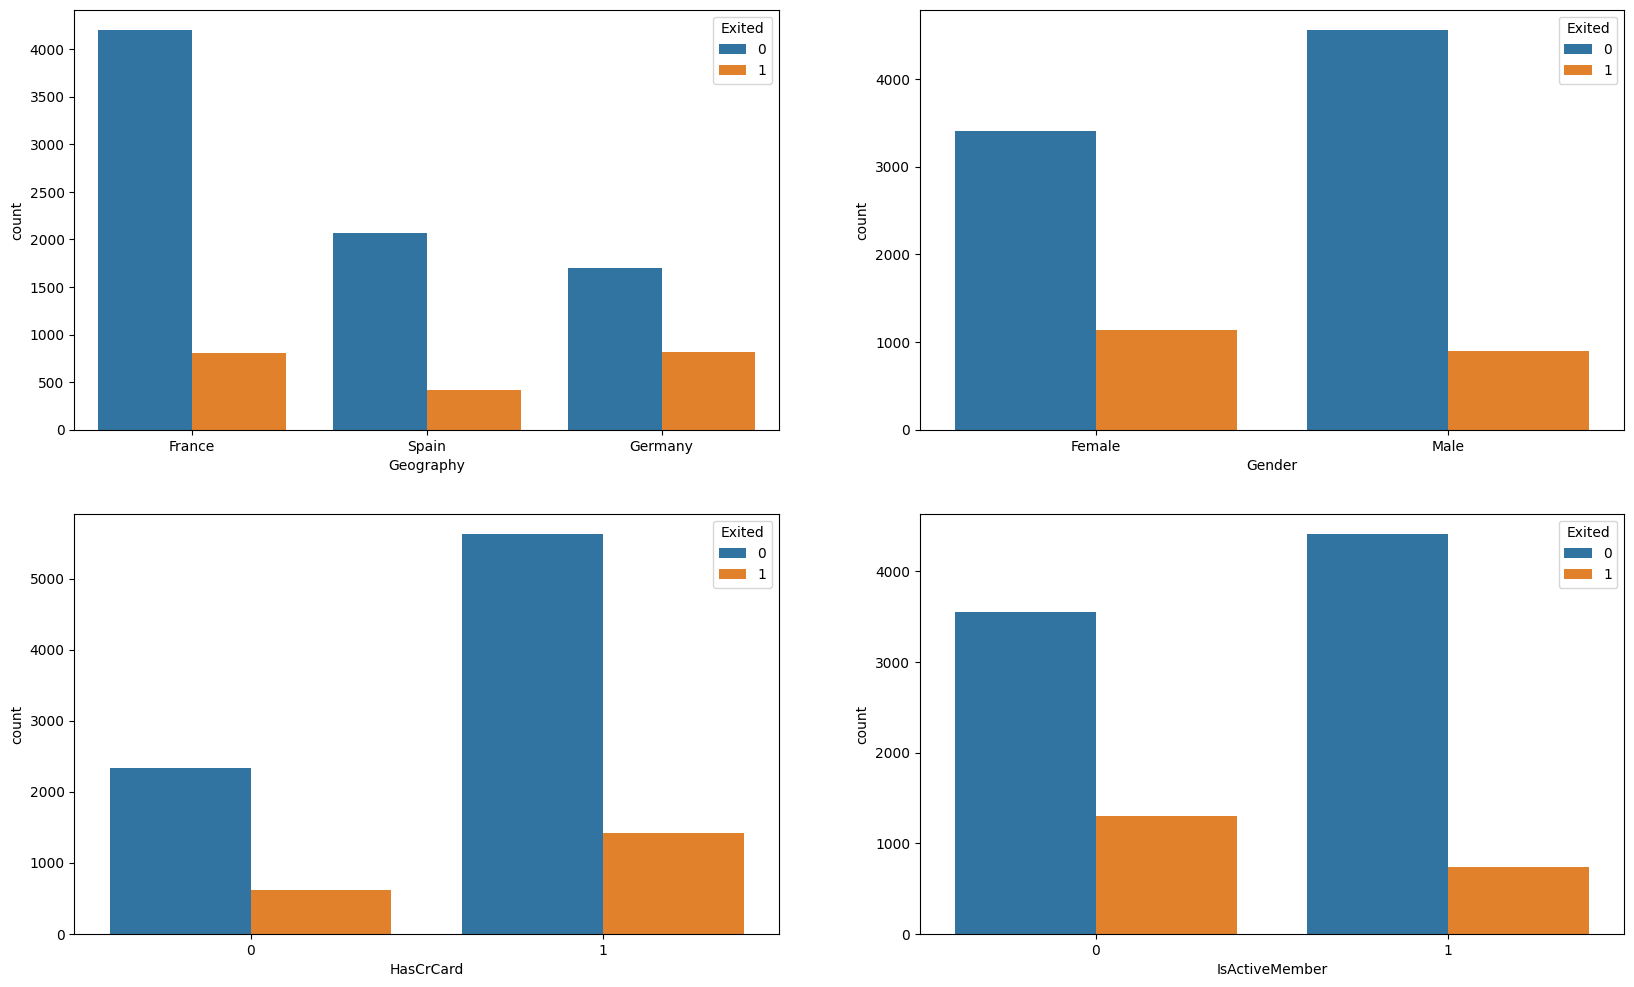

In [113]:
    # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

- Majority of the data is concerning customers from France. However, Spain and Germany seem to have higher rates of churn, this could suggest there are less customer service resources or incentives in the areas where it has fewer clients.
- Rate of female churners is higher than males.
- The inactive members have a muh higher rate of churn. It would seem that if the bank would apply some schemes to turn turn this group into active members they should see a shrink in churn amount  

fig, axis = plt.subplots(2,2,figsize = (20,12))


# Next we review how the continuous data attributes relates to Exited vs Retained 

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

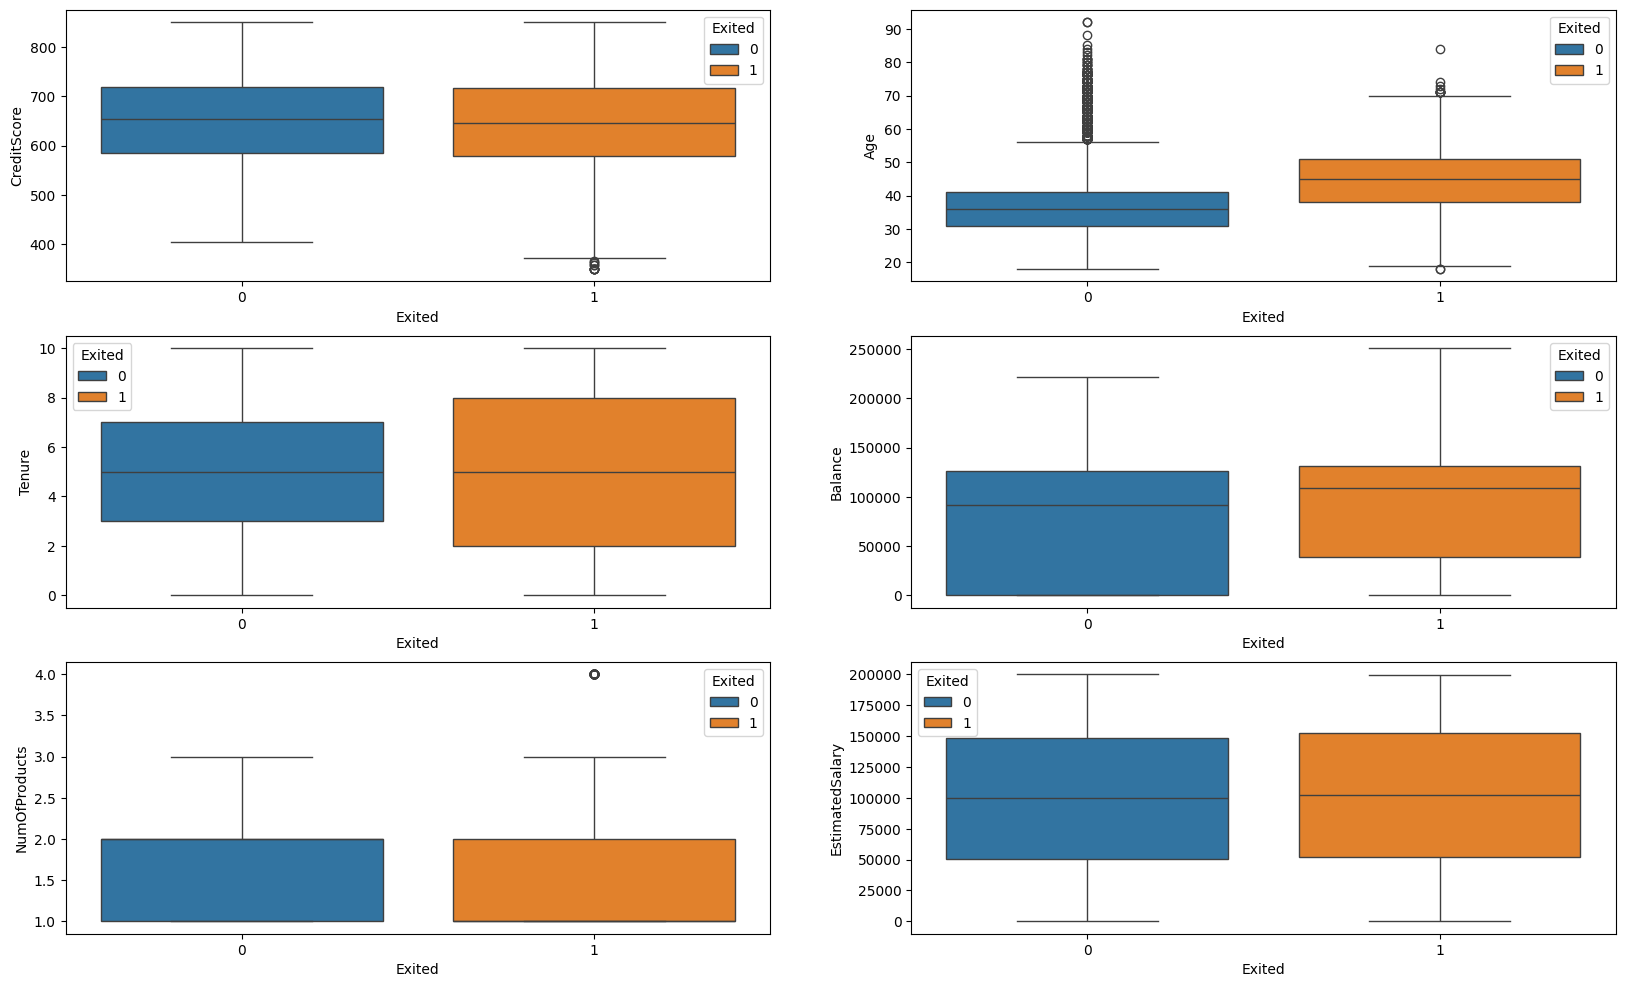

In [114]:
  # Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])



* There is no significant difference in the credit score distribution between retained and churned customers.
* The older customers are churning at a higher rate than the younger, suggesting there is a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
* With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
* Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
* Neither the product nor the salary has a significant effect on the likelihood to churn.

In [115]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Preprocessing 
We seek to add features that are likely to have an impact on the probability of churning. We first split the train and test sets

## Split the dataset


In [116]:
# Extract 20% of data to treat as unseen 

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 6)



We need to perform data processing and feature engineering independently for both our train and test datsets

In [117]:
data = [df_train,df_test]

## Feature engineering 
We seek to add features that are likely to have an impact on the probability of churning. 

(-1.0, 5.0)

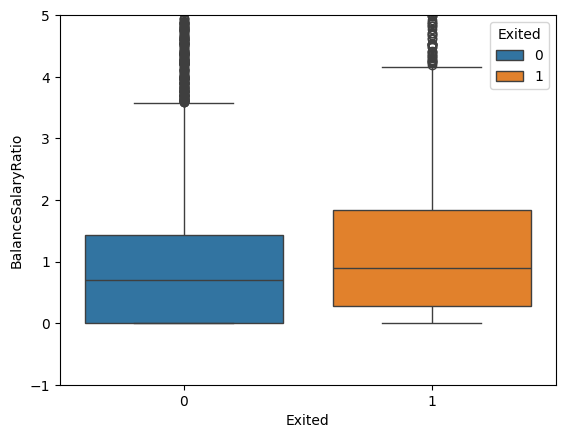

In [118]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

We have seen that the salary has little effect on the chance of a customer churning. However as seen above, the ratio of the bank balance to the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their available loan capital.

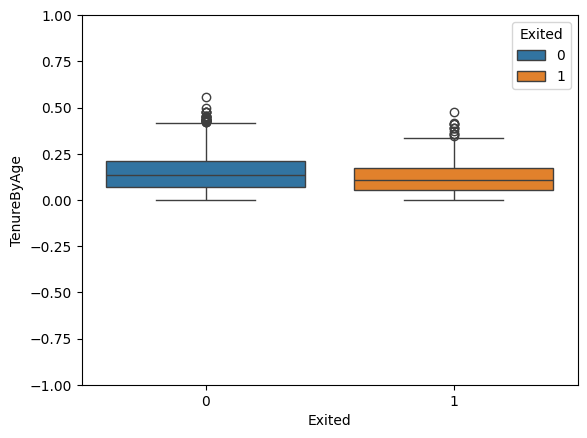

In [119]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

Lastly we introduce a variable to capture credit score given age to take into account how much this would be differ for younger portion of customers.

In [120]:


df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

We must now add these features independently for train and unseen test data to avoid data leakage.

In [121]:
for dataset in data:
    dataset['BalanceSalaryRatio'] = dataset.Balance/dataset.EstimatedSalary
    dataset['TenureByAge'] = dataset.Tenure/(dataset.Age)
    '''Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life'''
    dataset['CreditScoreGivenAge'] = dataset.CreditScore/(dataset.Age)

# Data prep for model fitting 

In [122]:
# Arrange columns by data type for easier manipulation

for index, dataset in enumerate(data):
    # Define the continuous and categorical variables
    continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
                       'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']
    cat_vars = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']
    
    # Create a new DataFrame with only the specified columns
    dataset = dataset[['Exited'] + continuous_vars + cat_vars]
    data[index] = dataset
    



For the one hot variables, we change 0 to -1 so that some models can capture a negative relationship between the feature not appearing and the target variable.
This is because -1 actively influences the weighted sum computed during the model training, 
particularly in neural networks, whereas 0 would simply not contribute. 

In [123]:

for dataset in data:
    dataset.loc[dataset.HasCrCard == 0, 'HasCrCard'] = -1
    dataset.loc[dataset.IsActiveMember == 0, 'IsActiveMember'] = -1



We encode the categorical variables 

In [124]:

from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False)

categorical_cols = ['Geography', 'Gender']

#Fit the encoder on the training data (data[0] is df_train)
encoder.fit(data[0][categorical_cols])

#Get the feature names based on the training data
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)


encoded_datasets = []
for index, dataset in enumerate(data):
    #Transform the data 
    encoded_data = encoder.transform(dataset[categorical_cols])
    #Create a DataFrame with the encoded data
    encoded_df = pd.DataFrame(encoded_data, columns = encoded_feature_names, index = dataset.index)
    #Change to one-hot encode with -1 and 1 instead of 1
    encoded_df = encoded_df.replace({0:-1})
    #Concatenate the encoded columns with the original DataFrame 
    processed_data = pd.concat([dataset.drop(categorical_cols, axis=1), encoded_df], axis=1)
    # Store the processed data back in the list
    data[index] = processed_data


data[0].head()
    




,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8247,0,505,25,5,114268.85,2,126728.27,0.901684,0.200000,20.200000,1,1,-1.0,1.0,-1.0,1.0,-1.0
705,1,750,40,5,168286.81,3,20451.99,8.228383,0.125000,18.750000,1,-1,-1.0,1.0,-1.0,-1.0,1.0
4451,0,578,34,4,175111.11,1,74858.30,2.339234,0.117647,17.000000,1,1,1.0,-1.0,-1.0,-1.0,1.0
4328,0,581,55,6,0.00,1,22442.13,0.000000,0.109091,10.563636,1,1,1.0,-1.0,-1.0,1.0,-1.0
3882,0,488,22,6,0.00,2,66393.89,0.000000,0.272727,22.181818,1,1,1.0,-1.0,-1.0,1.0,-1.0


### Transform Data
MinMax scaling transforms features to scale them within a specific range, [0, 1]. We scale with respect to the training minMax values to avoid exposing test data to the training set.

In [125]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler with feature range between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))


for dataset in data:
    #Fit and transform the continuous variables
    dataset[continuous_vars] = scaler.fit_transform(dataset[continuous_vars])


In [126]:
df_train,df_test = data

## Feature Reduction
We want to use the training set to find out the features that correlate least with Exited and drop them from both the training and test sets.

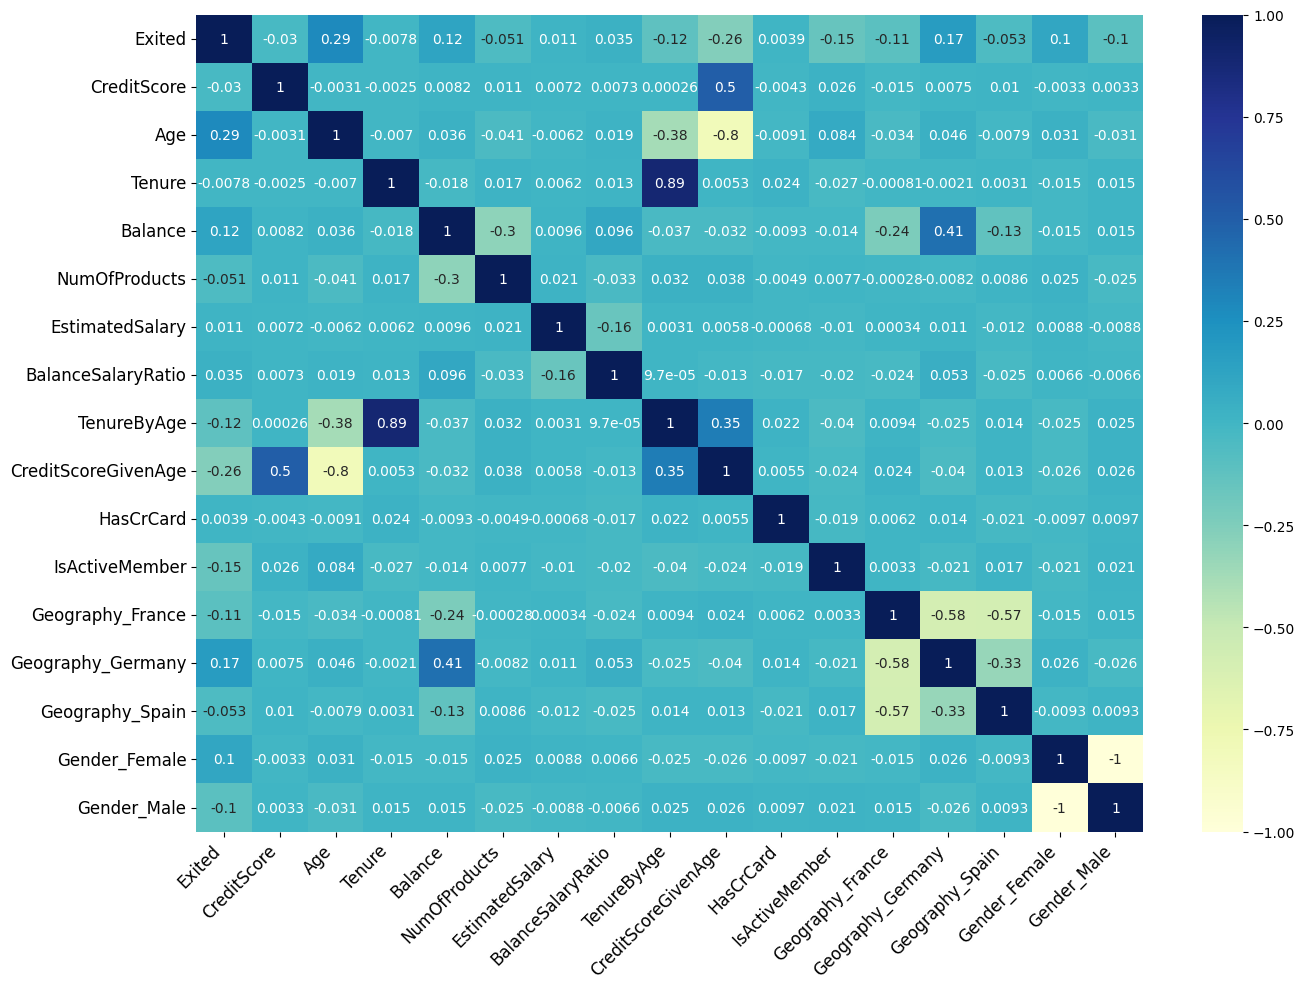

In [127]:

# Heat map analysis
plt.figure(figsize = (14, 10))
sns.heatmap(df_train.corr(), cmap = "YlGnBu", annot = True)
plt.xticks(rotation = 45, ha = "right", fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

In [128]:
# Extract and sort correlations by absolute value
correlations = df_train.corr()["Exited"].abs().sort_values(ascending = False)
print(correlations)

Exited                 1.000000
Age                    0.288580
CreditScoreGivenAge    0.259130
Geography_Germany      0.174224
IsActiveMember         0.154936
TenureByAge            0.117245
Balance                0.117209
Geography_France       0.105651
Gender_Female          0.101872
Gender_Male            0.101872
Geography_Spain        0.053073
NumOfProducts          0.050836
BalanceSalaryRatio     0.035173
CreditScore            0.030422
EstimatedSalary        0.010583
Tenure                 0.007789
HasCrCard              0.003937
Name: Exited, dtype: float64


We drop the features that correlate least with our target variable.

In [129]:
# Drop the Top 3 features that do not correlate with Exited : 
df_train.drop(['Tenure','EstimatedSalary','HasCrCard'], axis = 1, inplace = True) 

df_test.drop(['Tenure','EstimatedSalary','HasCrCard'], axis = 1, inplace = True) 

In [130]:
print(df_train.shape)
df_train.head()

(8000, 14)


,Exited,CreditScore,Age,Balance,NumOfProducts,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8247,0,-0.380,-8.108108e-01,-0.089121,-0.333333,-0.998640,-0.280000,-0.231332,1,-1.0,1.0,-1.0,1.0,-1.0
705,1,0.600,-4.054054e-01,0.341475,0.333333,-0.987590,-0.550000,-0.303976,-1,-1.0,1.0,-1.0,-1.0,1.0
4451,0,-0.088,-5.675676e-01,0.395874,-1.000000,-0.996472,-0.576471,-0.391650,1,1.0,-1.0,-1.0,-1.0,1.0
4328,0,-0.076,2.220446e-16,-1.000000,-1.000000,-1.000000,-0.607273,-0.714108,1,1.0,-1.0,-1.0,1.0,-1.0
3882,0,-0.448,-8.918919e-01,-1.000000,-0.333333,-1.000000,-0.018182,-0.132044,1,1.0,-1.0,-1.0,1.0,-1.0


In [131]:
print(df_test.shape)
df_test.head()

(2000, 14)


,Exited,CreditScore,Age,Balance,NumOfProducts,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
739,0,0.324786,-0.701493,-0.202483,-0.333333,-0.999597,0.028571,-0.106640,-1,1.0,-1.0,-1.0,1.0,-1.0
9426,1,-0.500000,0.044776,-0.368880,-0.333333,-0.999902,-0.932075,-0.870157,-1,-1.0,-1.0,1.0,1.0,-1.0
8200,1,0.645299,-0.134328,-1.000000,-1.000000,-1.000000,-0.617021,-0.525605,-1,-1.0,-1.0,1.0,-1.0,1.0
5880,0,-0.337607,-0.701493,-0.253625,-0.333333,-0.999912,-1.000000,-0.382904,1,1.0,-1.0,-1.0,-1.0,1.0
9114,0,-0.320513,-0.462687,-1.000000,-0.333333,-1.000000,-0.500000,-0.590052,-1,1.0,-1.0,-1.0,-1.0,1.0


## Store Test and Train splits

In [132]:
import pickle

X_train_raw = df_train.drop("Exited", axis = 1)
y_train_raw = df_train["Exited"]

X_test_raw = df_test.drop("Exited", axis = 1)
y_test_raw = df_test["Exited"]

# Combine all datasets into a dictionary
train_test_data = {
    'X_train_raw': X_train_raw,
    'X_test_raw': X_test_raw,
    'y_train_raw': y_train_raw,
    'y_test_raw': y_test_raw
}
# Save the dictionary into a single pickle file
with open("../data/train_test_data.pickle", "wb") as f:
    pickle.dump(train_test_data, f)

In [133]:
print(X_train_raw.shape)
print(X_test_raw.shape)

(8000, 13)
(2000, 13)


### Different Splits and Resampling Techniques of Training Data
This is done to assess model performance 

(random split)Train data shape: (6400, 13), Train target shape: (6400,)
(random split)Validate data shape: (1600, 13), Test target shape: (1600,)


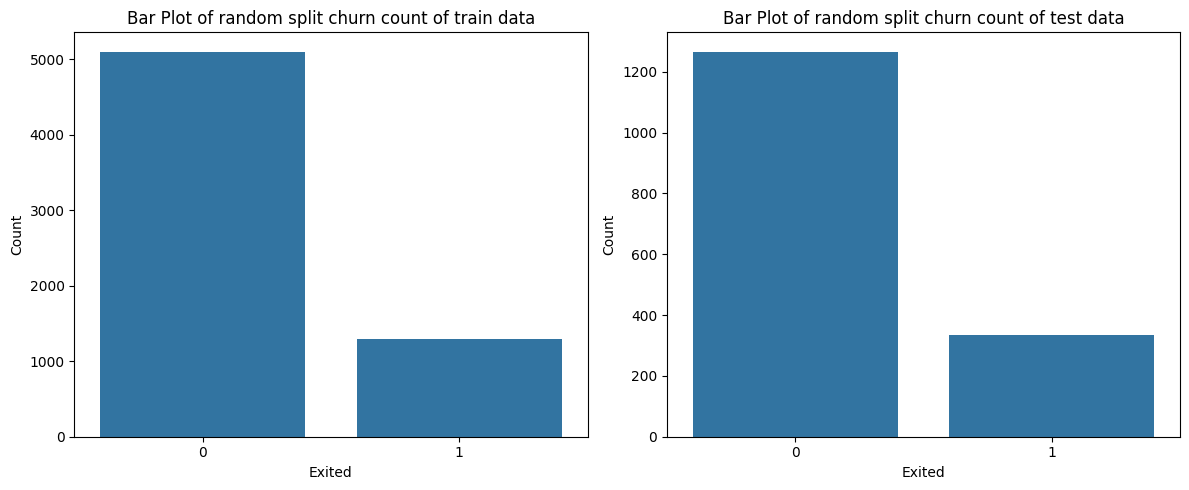

(stratified split)Train data shape: (6400, 13), Train target shape: (6400,)
(stratified split)Validate data shape: (1600, 13), Test target shape: (1600,)


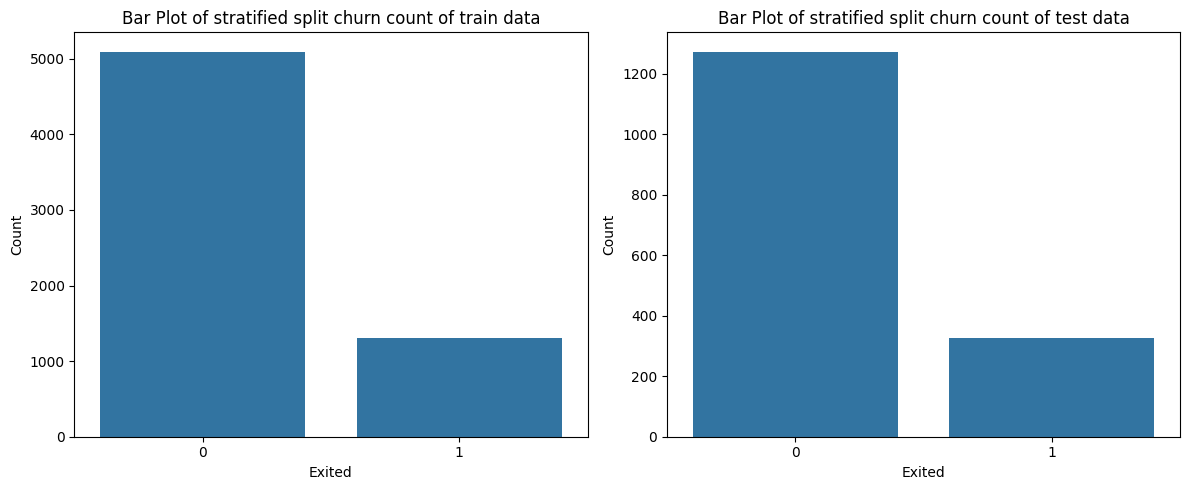

(undersample split)Train data shape: (2594, 13), Train target shape: (2594,)
(undersample split)Validate data shape: (1600, 13), Test target shape: (1600,)


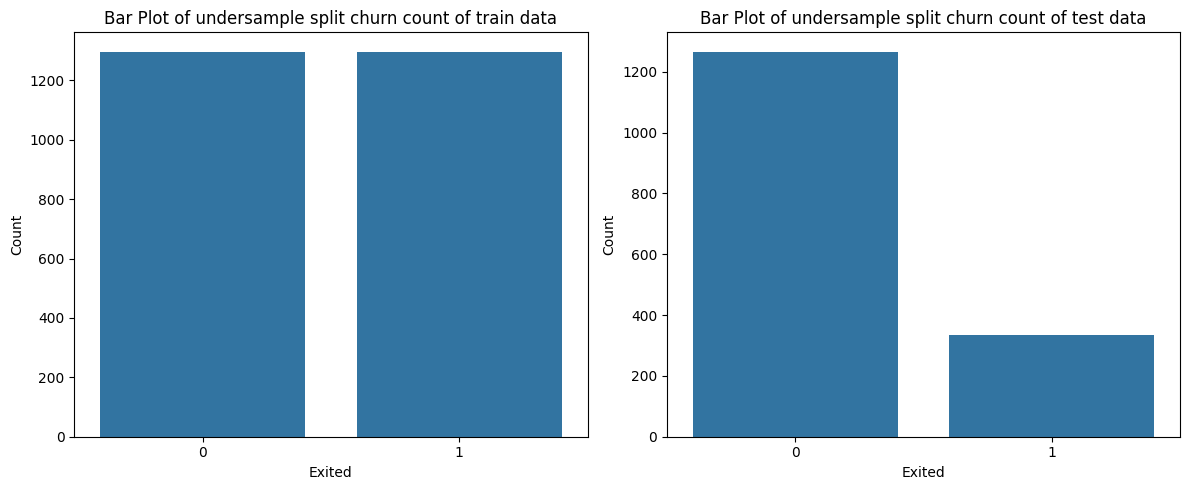

(oversample split)Train data shape: (10206, 13), Train target shape: (10206,)
(oversample split)Validate data shape: (1600, 13), Test target shape: (1600,)


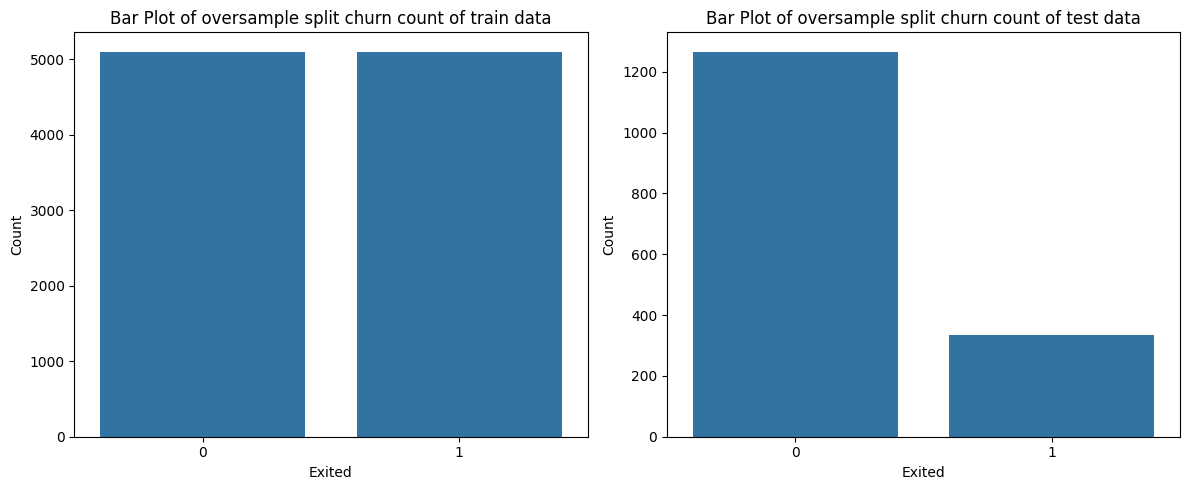

In [134]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler



random_split = train_test_split(X_train_raw, y_train_raw, test_size = 0.2, random_state = 7)

stratified_split = train_test_split(X_train_raw, y_train_raw, test_size=0.2, random_state=7, stratify=y_train_raw)



X_train, X_val, y_train, y_val = train_test_split(X_train_raw, y_train_raw, test_size=0.2, random_state=7)


#For resampling techniques we use the random split we computed first 
X_train, X_val, y_train, y_val = random_split

#Apply RandomUnderSampler to the training data only 
rus = RandomUnderSampler(sampling_strategy = "auto", random_state=7)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
rus_split = (X_train_under, X_val, y_train_under, y_val)

#Apply RandomOverSampler to the training data only 
ros = RandomOverSampler(sampling_strategy="auto", random_state=7)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)
ros_split = (X_train_over, X_val, y_train_over, y_val)


split_data = {
        'random':random_split,
        'stratified':stratified_split,
        'undersample':rus_split,
        'oversample':ros_split
}


with open('../data/train_splits.pickle','wb') as file:
        pickle.dump(split_data,file)


for split in split_data: 
        # Display the shapes of the resulting datasets
        X_train, X_val, y_train, y_val = split_data[split]
        print(f"({split} split)Train data shape: {X_train.shape}, Train target shape: {y_train.shape}")
        print(f"({split} split)Validate data shape: {X_val.shape}, Test target shape: {y_val.shape}")

        # Plot the distribution of y_train
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.countplot(x=y_train)
        plt.title(f"Bar Plot of {split} split churn count of train data")
        plt.xlabel('Exited')
        plt.ylabel('Count')

        # Plot the distribution of y_test_strat
        plt.subplot(1, 2, 2)
        sns.countplot(x=y_val)
        plt.title(f"Bar Plot of {split} split churn count of test data")
        plt.xlabel('Exited')
        plt.ylabel('Count')

        plt.tight_layout()
        plt.show()

## Why Split?


- Random: Since we are working with an imbalanced dataset with almost 80% of records having our target variable as 0 i.e. Retained, we will evaluate our model on different types of splits and resampling techniques to understand if the data we have available in training affects the performance of our models. The random split creates a basic partition of the data without consideration of the 0 or 1 classes. This allows our model to learn from the data as it exists without alteration, preserving the natural imbalance in the dataset. A random split will likely result in a similar distribution to the training and validation sets. This imbalance may lead the model to favour predicting the majority class (Retained, 0), leading to poor performance in predicting churn cases. 
-Stratified: A stratified split ensures that the training and validation sets have the same class distribution, i.e. both the training and validation sets would roughly maintain the 80:20 distribution of non-churn to churn cases. Prevents an over- or under-representation of the two classes in the training and validation datasets, which helps create consistent model performance during training and evaluation. Although, much like the random split, the stratified split doesn't address the imbalance, which similarly leads to biased towards predicting the majority Retained class. Random undersampling reduces the number of majority class examples in the training data to match the number of minority class examples. This creates a balanced dataset where both classes are represented equally in the training set.
- Undersampling: Random undersampling reduces the number of majority class retain records in the training data to match the number of minority class exited records. This creates a balanced dataset where both classes are represented equally in the training set. This helps the model focus on the minority class (churn), as it is now equally represented in the training set, which should improve performance in accurately predicting churners. A potential downside is this will potenitally discard valuable data from the Retained class which might lead to underfitting. This stems from to the model losing characteristics that help predict the retained class, potentially decreasing generalisation of our models.
- Oversampling: Random oversampling increases the number of exited class instances by duplicating them in the training data. This balances the class distribution in the training dataset without reducing the number of retained records. The risk is this will overfit to the churn records as it sees them multiple times, so associates those specific feature values to churning.

### Reference
- [1] https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction